In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
%matplotlib inline

In [5]:
df = pd.read_csv('C:/Users/DCL\Desktop\ML-20230831T022512Z-001\ML\Data\emails.csv')

In [6]:
df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [7]:
df.shape

(5728, 2)

In [8]:
df['spam'].value_counts()

0    4360
1    1368
Name: spam, dtype: int64

<Axes: xlabel='spam', ylabel='count'>

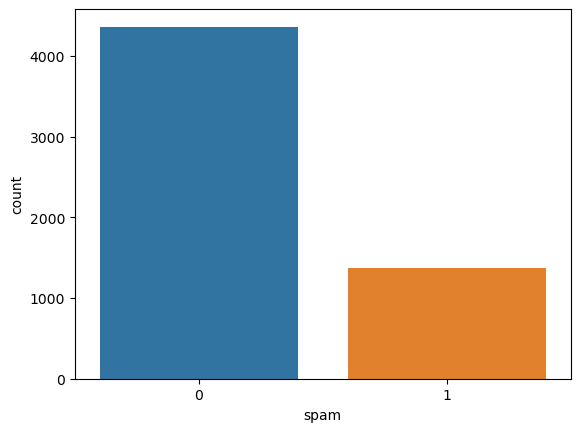

In [9]:
seaborn.countplot(x='spam',data=df)

In [10]:
df.isnull().sum()

text    0
spam    0
dtype: int64

In [11]:
X= df.text.values
y= df.spam.values

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
X_vectorized=cv.fit_transform(X)
X_vectorized.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [4, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [13]:
#Dataset splitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_vectorized,y,test_size=.25,random_state=1)

In [14]:
from sklearn.naive_bayes import MultinomialNB

#Create a Gaussian Classifier
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
pred=mnb.predict(X_test)

In [15]:
print("Accuracy score: ", accuracy_score(y_test,pred))

Accuracy score:  0.9916201117318436


In [16]:
confusion_matrix(y_test,pred)

array([[1076,    7],
       [   5,  344]], dtype=int64)

In [17]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1083
           1       0.98      0.99      0.98       349

    accuracy                           0.99      1432
   macro avg       0.99      0.99      0.99      1432
weighted avg       0.99      0.99      0.99      1432



Text(0.5, 427.9555555555555, 'Predicted label')

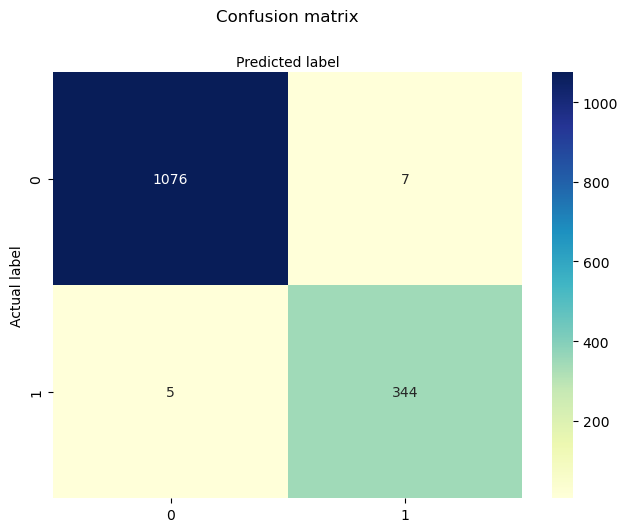

In [18]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
seaborn.heatmap(pd.DataFrame(confusion_matrix(y_test,pred)), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [19]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

In [20]:
df = load_diabetes()
X = df.data
y= df.target
X.shape

(442, 10)

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [22]:
# Linear Regression
reg = LinearRegression()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)

In [23]:
print(reg.coef_)
print(reg.intercept_)

print("R2 score",r2_score(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

[  -9.15865318 -205.45432163  516.69374454  340.61999905 -895.5520019
  561.22067904  153.89310954  126.73139688  861.12700152   52.42112238]
151.88331005254167
R2 score 0.4399338661568968
RMSE 55.627840795469155


In [24]:
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)

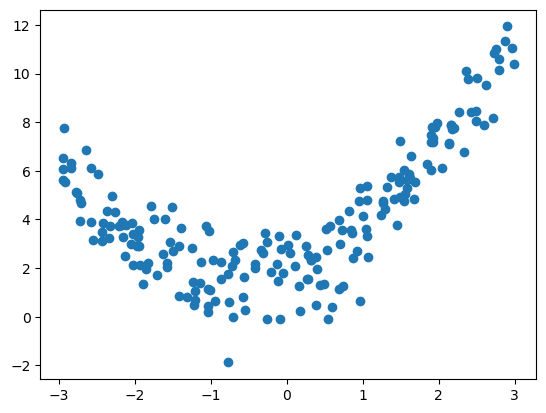

In [26]:
plt.scatter(X, y)
plt.show()

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [29]:
#polynomial transformation

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=16,include_bias=True) #hyperparameter is degree

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [30]:
# Applying Polynomial Linear Regression
lr1 = Ridge(alpha=200)
lr1.fit(X_train_trans,y_train)
y_pred = lr1.predict(X_test_trans)


In [31]:
print("R2 score",r2_score(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score 0.8443652267185818
RMSE 1.2290373274572222


In [32]:
lr2 = Ridge(alpha=2)
lr2.fit(X_train_trans,y_train)
y_pred = lr2.predict(X_test_trans)

In [33]:
print("R2 score",r2_score(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score 0.840880027752301
RMSE 1.2427223288536284


In [34]:
X_new=np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new1 = lr1.predict(X_new_poly)
y_new2 = lr2.predict(X_new_poly)

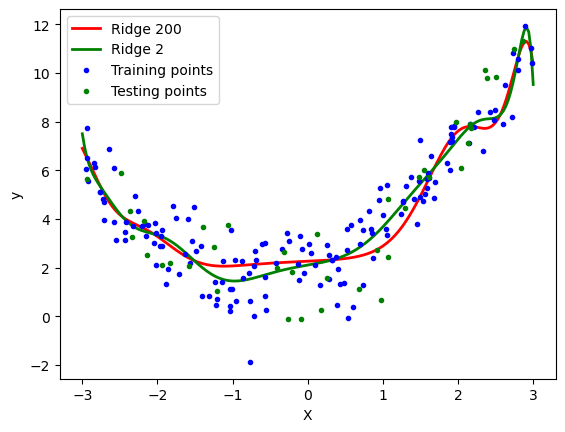

In [35]:
plt.plot(X_new, y_new1, "r-", linewidth=2, label="Ridge 200")
plt.plot(X_new, y_new2, "g-", linewidth=2, label="Ridge 2")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()